## ネットワークシミュレーター

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random


### ステップ1

In [3]:
class Packet:
    def __init__(self, source, destination, data):
        self.source = source
        self.destination = destination
        self.data = data

class Node:
    def __init__(self, id, router):
        self.id = id
        self.router = router

    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)
        self.router.forward_packet(packet)

    def receive_packet(self, packet):
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")

class Router:
    def __init__(self):
        self.connections = {}

    def connect(self, node):
        self.connections[node.id] = node

    def forward_packet(self, packet):
        if packet.destination in self.connections:
            self.connections[packet.destination].receive_packet(packet)
        else:
            print(f"No route to destination {packet.destination}")

# この関数はシミュレーションを実行します。
def simulate_network():
    # ルーターとノードを作成
    router = Router()
    nodes = [Node(id, router) for id in range(5)]  # 5つのノードを作成

    # ルーターにノードを接続
    for node in nodes:
        router.connect(node)

    # パケットを送信
    for i in range(10):  # 10個のパケットをランダムに送信
        source_node = random.choice(nodes)
        destination_node = random.choice(nodes)
        source_node.send_packet(destination_node.id, f"Test data {i}")

# シミュレーション開始
simulate_network()

Node 4 received packet from Node 3: Test data 0
Node 3 received packet from Node 1: Test data 1
Node 1 received packet from Node 2: Test data 2
Node 0 received packet from Node 3: Test data 3
Node 2 received packet from Node 1: Test data 4
Node 3 received packet from Node 3: Test data 5
Node 3 received packet from Node 1: Test data 6
Node 1 received packet from Node 1: Test data 7
Node 3 received packet from Node 4: Test data 8
Node 2 received packet from Node 2: Test data 9


### ステップ2

In [4]:
import random
import time
from threading import Thread



In [5]:
import random
import time
from threading import Thread

# パケットクラス：ネットワークを通じて送受信されるデータのパケットを表します。
class Packet:
    def __init__(self, source, destination, data):
        self.source = source  # パケットの送信元ノード
        self.destination = destination  # パケットの宛先ノード
        self.data = data  # パケットの内容

# ノードクラス：ネットワーク上の個別のデバイス（例：コンピュータ、スイッチなど）を表します。
class Node:
    def __init__(self, id, router):
        self.id = id  # ノードの識別子
        self.router = router  # このノードが接続されているルーター

    # パケットを送信するメソッド
    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)  # パケットを作成
        self.router.forward_packet(packet)  # パケットをルーターに転送して送信

    # パケットを受信するメソッド
    def receive_packet(self, packet):
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")

# ルータークラス：ネットワーク上のトラフィックを管理し、パケットを適切な宛先に転送します。
class Router:
    def __init__(self, routing_algorithm):
        self.connections = {}  # このルーターに接続されているノードのリスト
        self.routing_algorithm = routing_algorithm  # 使用するルーティングアルゴリズム

    # ノードをルーターに接続するメソッド
    def connect(self, node):
        self.connections[node.id] = node  # ノードを接続リストに追加

    # パケットを転送するメソッド
    def forward_packet(self, packet):
        # ルーティングアルゴリズムを使用してパケットの宛先を決定し、パケットをその宛先に転送
        destination = self.routing_algorithm(self, packet)
        if destination in self.connections:
            self.connections[destination].receive_packet(packet)
        else:
            print(f"宛先 {packet.destination} へのルートがありません")

    # 直接ルーティングアルゴリズム（パケットを指定された宛先に直接転送）
    def direct_routing(self, packet):
        return packet.destination

    # ランダムルーティングアルゴリズム（接続されているノードからランダムに宛先を選択）
    def random_routing(self, packet):
        return random.choice(list(self.connections.keys()))

# ノードがランダムな間隔でパケットを生成し、ルーターに送信するプロセス
def node_activity(node, router, num_packets):
    for _ in range(num_packets):
        time.sleep(random.uniform(0.5, 2))  # 0.5秒から2秒の間でランダムな時間スリープ
        destination = random.choice(list(router.connections.keys()))  # ランダムな宛先を選択
        node.send_packet(destination, f"Data from {node.id}")  # パケットを送信

# ネットワークシミュレーションのメインプロセス
def simulate_network(routing_type='direct', fault_rate=0.1):
    # ルーティングアルゴリズムを選択
    if routing_type == 'random':
        routing_algorithm = Router.random_routing
    else:
        routing_algorithm = Router.direct_routing

    # ルーターとノードを作成
    router = Router(routing_algorithm)
    nodes = [Node(id, router) for id in range(5)]  # 5つのノードを作成

    # ルーターにノードを接続
    for node in nodes:
        router.connect(node)

    metrics = NetworkMetrics()  # パフォーマンスメトリクスを記録するオブジェクトを作成

    # 各ノードでパケット生成と送信のアクティビティを開始
    threads = []
    for node in nodes:
        process = Thread(target=node_activity, args=(node, router, 5, metrics))  # 各ノードが5つのパケットを送信
        process.start()
        threads.append(process)

    # ネットワークに障害を導入
    introduce_faults(router, metrics, fault_rate)  # ここで直接関数を呼び出します。

    # すべてのスレッドが完了するのを待つ
    for process in threads:
        process.join()

    # パフォーマンスメトリクスを計算して出力
    results = metrics.calculate_metrics()
    for key, value in results.items():
        print(f"{key}: {value}")

# シミュレーションを開始
simulate_network('direct', fault_rate=0.1)

NameError: name 'NetworkMetrics' is not defined

In [6]:
from threading import Thread, Lock

# パフォーマンスメトリクスを記録するためのクラス
class NetworkMetrics:
    def __init__(self):
        self.sent_packets = 0
        self.successful_deliveries = 0
        self.failed_deliveries = 0
        self.total_latency = 0.0
        self.lock = Lock()

    def packet_sent(self):
        with self.lock:
            self.sent_packets += 1

    def packet_delivered(self, latency):
        with self.lock:
            self.successful_deliveries += 1
            self.total_latency += latency

    def packet_failed(self):
        with self.lock:
            self.failed_deliveries += 1

    def calculate_metrics(self):
        with self.lock:
            loss_rate = self.failed_deliveries / self.sent_packets if self.sent_packets else 0
            average_latency = self.total_latency / self.successful_deliveries if self.successful_deliveries else 0
        return {
            "packets_sent": self.sent_packets,
            "successful_deliveries": self.successful_deliveries,
            "failed_deliveries": self.failed_deliveries,
            "packet_loss_rate": loss_rate,
            "average_latency": average_latency
        }

# ノードがランダムな間隔でパケットを生成し、ルーターに送信するプロセス
def node_activity(node, router, num_packets, metrics):
    for _ in range(num_packets):
        time.sleep(random.uniform(0.5, 2))  # ランダムな遅延を生成
        destination = random.choice(list(router.connections.keys()))
        start_time = time.time()
        if node.send_packet(destination, f"Data from {node.id}"):
            end_time = time.time()
            latency = end_time - start_time  # 送信遅延を計算
            metrics.packet_delivered(latency)
        else:
            metrics.packet_failed()

# ネットワークに障害を導入する（例：ランダムに経路を断つ）
def introduce_faults(router, metrics, fault_rate=0.1):
    while True:
        time.sleep(random.uniform(2, 5))  # 障害が発生する間隔
        if random.random() < fault_rate:
            node_id = random.choice(list(router.connections.keys()))
            node = router.connections[node_id]

            # ノードを一時的にネットワークから切断
            print(f"Node {node_id} is down")
            del router.connections[node_id]

            # 一定期間後にノードをネットワークに再接続
            time.sleep(random.uniform(2, 5))  # ノードがダウンしている期間
            router.connections[node_id] = node
            print(f"Node {node_id} is back up")

# ネットワークシミュレーションのメインプロセス
def simulate_network(routing_type='direct', fault_rate=0.1):
    # ... [以前のステップで定義した simulate_network のコード] ...

    metrics = NetworkMetrics()  # パフォーマンスメトリクスを記録するオブジェクトを作成

    # ネットワークに障害を導入するスレッドを開始
    fault_thread = Thread(target=introduce_faults, args=(router, metrics, fault_rate))
    fault_thread.start()

    # ... [ノードのアクティビティを開始する部分のコード] ...

    # すべてのスレッドが完了するのを待つ
    for process in threads:
        process.join()

    fault_thread.join()  # 障害導入スレッドが終了するのを待つ

    # パフォーマンスメトリクスを計算して出力
    results = metrics.calculate_metrics()
    for key, value in results.items():
        print(f"{key}: {value}")

# シミュレーションを開始
simulate_network('direct', fault_rate=0.1)

NameError: name 'router' is not defined

## STEP3

In [7]:
import random
import time
from threading import Thread, Lock

class Packet:
    def __init__(self, source, destination, data):
        self.source = source
        self.destination = destination
        self.data = data

class Node:
    def __init__(self, id, router):
        self.id = id
        self.router = router

    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)
        return self.router.forward_packet(packet)

    def receive_packet(self, packet):
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")

class Router:
    def __init__(self, routing_algorithm):
        self.connections = {}
        self.routing_algorithm = routing_algorithm

    def connect(self, node):
        self.connections[node.id] = node

    def forward_packet(self, packet):
        if self.routing_algorithm(self, packet):
            return True
        else:
            return False

    def direct_routing(self, packet):
        if packet.destination in self.connections:
            self.connections[packet.destination].receive_packet(packet)
            return True
        else:
            print(f"No route to destination {packet.destination}")
            return False

    def random_routing(self, packet):
        # Random routing selects a random destination.
        destination = random.choice(list(self.connections.keys()))
        self.connections[destination].receive_packet(packet)
        return True

class NetworkMetrics:
    def __init__(self):
        self.sent_packets = 0
        self.successful_deliveries = 0
        self.failed_deliveries = 0
        self.total_latency = 0.0
        self.lock = Lock()

    def packet_sent(self):
        with self.lock:
            self.sent_packets += 1

    def packet_delivered(self, latency):
        with self.lock:
            self.successful_deliveries += 1
            self.total_latency += latency

    def packet_failed(self):
        with self.lock:
            self.failed_deliveries += 1

    def calculate_metrics(self):
        with self.lock:
            loss_rate = self.failed_deliveries / self.sent_packets if self.sent_packets else 0
            average_latency = self.total_latency / self.successful_deliveries if self.successful_deliveries else 0
        return {
            "packets_sent": self.sent_packets,
            "successful_deliveries": self.successful_deliveries,
            "failed_deliveries": self.failed_deliveries,
            "packet_loss_rate": loss_rate,
            "average_latency": average_latency
        }

def node_activity(node, router, num_packets, metrics):
    for _ in range(num_packets):
        time.sleep(random.uniform(0.5, 2))  # Random sleep between 0.5 to 2 seconds
        destination = random.choice(list(router.connections.keys()))
        start_time = time.time()
        metrics.packet_sent()  # Recording that a packet has been sent
        if node.send_packet(destination, f"Data from {node.id}"):
            end_time = time.time()
            latency = end_time - start_time  # Calculating the latency
            metrics.packet_delivered(latency)  # Recording a successful packet delivery
        else:
            metrics.packet_failed()  # Recording a failed packet delivery

def introduce_faults(router, metrics, fault_rate=0.1):
    while True:
        time.sleep(random.uniform(2, 5))  # Random sleep to simulate the erratic nature of network faults
        if random.random() < fault_rate:
            if router.connections:  # Checking if there are any connections to drop
                node_id = random.choice(list(router.connections.keys()))
                # Simulating a node going down
                print(f"Node {node_id} is down")
                del router.connections[node_id]

                # Wait for a period before bringing the node back up
                time.sleep(random.uniform(2, 5))
                print(f"Node {node_id} is back up")
                # We're simulating the node coming back online by adding it back to the router's connections
                router.connect(Node(node_id, router))

def simulate_network(routing_type='direct', fault_rate=0.1):
    if routing_type == 'random':
        routing_algorithm = Router.random_routing
    else:
        routing_algorithm = Router.direct_routing

    router = Router(routing_algorithm)
    nodes = [Node(id, router) for id in range(5)]

    for node in nodes:
        router.connect(node)

    metrics = NetworkMetrics()

    threads = []
    for node in nodes:
        process = Thread(target=node_activity, args=(node, router, 5, metrics))
        process.start()
        threads.append(process)

    # Simulating network faults in the main thread
    try:
        introduce_faults(router, metrics, fault_rate)
    except KeyboardInterrupt:
        pass

    for process in threads:
        process.join()

    results = metrics.calculate_metrics()
    for key, value in results.items():
        print(f"{key}: {value}")

simulate_network('direct', fault_rate=0.1)

Node 2 received packet from Node 1: Data from 1
Node 2 received packet from Node 3: Data from 3
Node 1 received packet from Node 2: Data from 2
Node 4 received packet from Node 0: Data from 0
Node 3 received packet from Node 4: Data from 4
Node 1 received packet from Node 1: Data from 1
Node 0 received packet from Node 3: Data from 3
Node 2 received packet from Node 2: Data from 2
Node 3 received packet from Node 4: Data from 4
Node 1 received packet from Node 0: Data from 0
Node 1 received packet from Node 2: Data from 2
Node 4 received packet from Node 3: Data from 3
Node 2 received packet from Node 3: Data from 3
Node 2 received packet from Node 1: Data from 1
Node 0 received packet from Node 2: Data from 2
Node 2 received packet from Node 4: Data from 4
Node 3 received packet from Node 1: Data from 1
Node 2 received packet from Node 0: Data from 0
Node 0 received packet from Node 3: Data from 3
Node 0 received packet from Node 1: Data from 1
Node 1 received packet from Node 4: Data

## STEP4

In [8]:
import matplotlib.pyplot as plt

def run_simulations():
    # 異なるルーティングアルゴリズムで複数回のシミュレーションを実行し、結果を収集します。
    routing_algorithms = ['direct', 'random']  # 使用するルーティングアルゴリズム
    results = {}

    for algorithm in routing_algorithms:
        print(f"Running simulation with {algorithm} routing...")
        metrics = simulate_network(routing_type=algorithm, fault_rate=0.1)  # 前のステップで定義したシミュレーション関数
        results[algorithm] = metrics.calculate_metrics()

    return results

def visualize_results(results):
    # 収集したデータをグラフにプロットします。
    labels = results.keys()
    packet_loss = [metrics['packet_loss_rate'] for metrics in results.values()]
    average_latency = [metrics['average_latency'] for metrics in results.values()]

    # パケットロス率のグラフ
    plt.figure(figsize=(10, 6))
    plt.bar(labels, packet_loss, color='blue')
    plt.xlabel('Routing Algorithm')
    plt.ylabel('Packet Loss Rate')
    plt.title('Comparison of Packet Loss Rate')
    plt.ylim([0, 1])  # y軸の範囲を0から1に設定
    plt.grid(True)
    plt.show()

    # 平均遅延時間のグラフ
    plt.figure(figsize=(10, 6))
    plt.bar(labels, average_latency, color='red')
    plt.xlabel('Routing Algorithm')
    plt.ylabel('Average Latency (seconds)')
    plt.title('Comparison of Average Latency')
    plt.grid(True)
    plt.show()

# シミュレーションを実行し、結果をグラフにプロット
simulation_results = run_simulations()
visualize_results(simulation_results)

Running simulation with direct routing...
Node 1 received packet from Node 4: Data from 4
Node 1 received packet from Node 1: Data from 1
Node 2 received packet from Node 0: Data from 0
Node 2 received packet from Node 2: Data from 2
Node 1 received packet from Node 3: Data from 3
Node 2 received packet from Node 4: Data from 4
Node 0 received packet from Node 1: Data from 1
Node 1 received packet from Node 2: Data from 2
Node 3 received packet from Node 4: Data from 4
Node 3 received packet from Node 3: Data from 3
Node 3 is down
Node 2 received packet from Node 0: Data from 0
Node 1 received packet from Node 4: Data from 4
Node 1 received packet from Node 1: Data from 1
Node 1 received packet from Node 2: Data from 2
Node 1 received packet from Node 2: Data from 2
Node 0 received packet from Node 3: Data from 3
Node 0 received packet from Node 0: Data from 0
Node 2 received packet from Node 4: Data from 4
Node 0 received packet from Node 1: Data from 1
Node 2 received packet from Nod

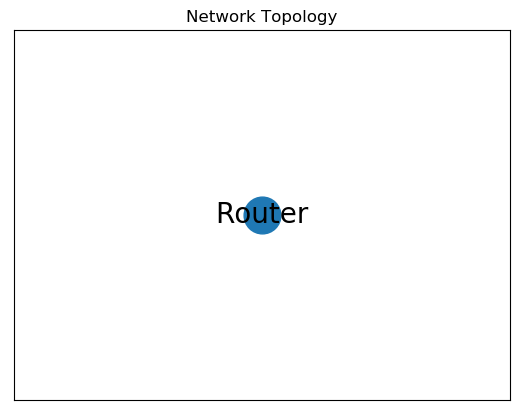

Running simulation with direct routing...
Node 1 received packet from Node 2: Data from 2
Packet path: [2, 'Router', 1]
Node 2 received packet from Node 1: Data from 1
Packet path: [1, 'Router', 2]
Node 3 received packet from Node 1: Data from 1
Packet path: [1, 'Router', 3]
Node 3 received packet from Node 4: Data from 4
Packet path: [4, 'Router', 3]
Node 0 received packet from Node 3: Data from 3
Packet path: [3, 'Router', 0]
Node 4 received packet from Node 0: Data from 0
Packet path: [0, 'Router', 4]
Node 0 received packet from Node 2: Data from 2
Packet path: [2, 'Router', 0]
Node 2 received packet from Node 1: Data from 1
Packet path: [1, 'Router', 2]
Node 1 received packet from Node 4: Data from 4
Packet path: [4, 'Router', 1]
Node 1 received packet from Node 0: Data from 0
Packet path: [0, 'Router', 1]
Node 1 received packet from Node 1: Data from 1
Packet path: [1, 'Router', 1]
Node 2 received packet from Node 2: Data from 2
Packet path: [2, 'Router', 2]
Node 1 received packet

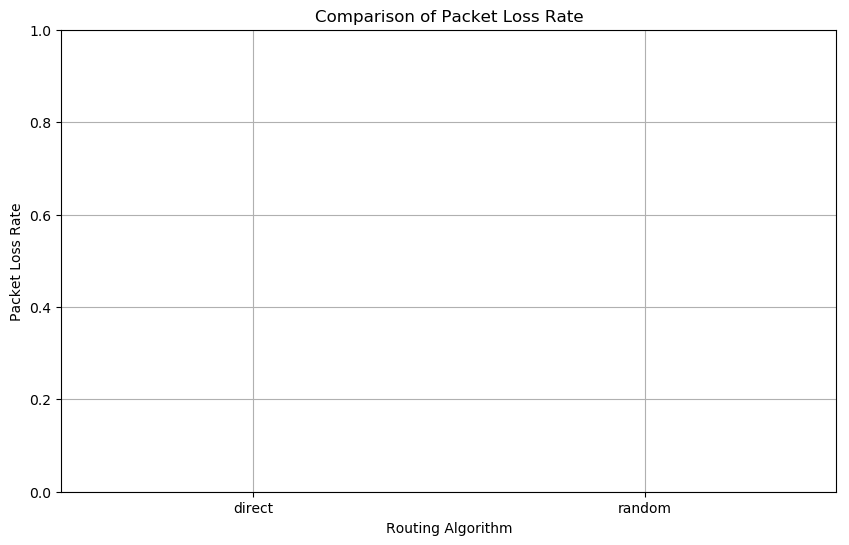

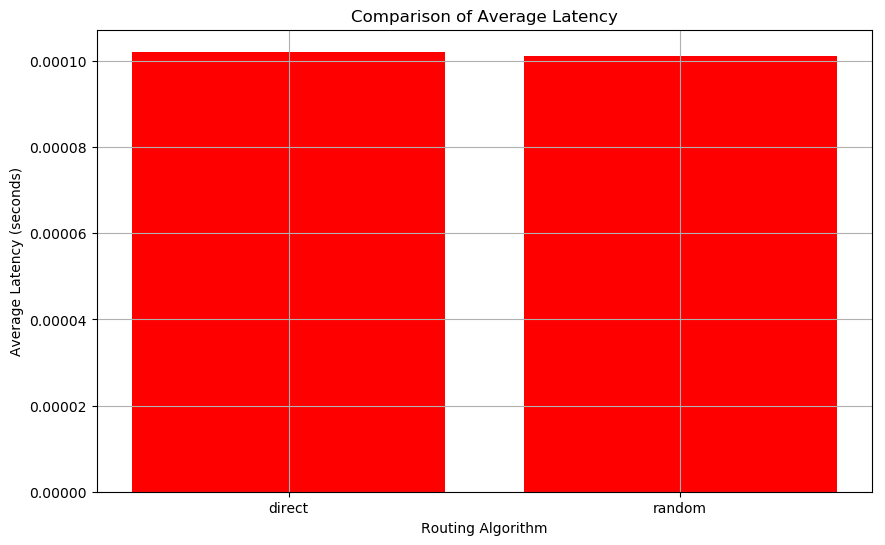

In [28]:
import random
import time
from threading import Thread, Lock
import matplotlib.pyplot as plt
import networkx as nx

# パケットを表すクラス
class Packet:
    def __init__(self, source, destination, data):
        self.source = source
        self.destination = destination
        self.data = data
        self.path = [source]  # Adding a path attribute to track the packet's path


# ネットワーク内の個々のノードを表すクラス
class Node:
    def __init__(self, id, router):
        self.id = id
        self.router = router

    def send_packet(self, destination, data):
        packet = Packet(self.id, destination, data)
        return self.router.forward_packet(packet)

    def receive_packet(self, packet):
        print(f"Node {self.id} received packet from Node {packet.source}: {packet.data}")
        print(f"Packet path: {packet.path}")  # Print the packet's path when it is received

# パケットのルーティングを処理するルータークラス
class Router:
    def __init__(self, routing_algorithm):
        self.connections = {}
        self.routing_algorithm = routing_algorithm

    def connect(self, node):
        self.connections[node.id] = node

    def forward_packet(self, packet):
        if self.routing_algorithm(self, packet):
            return True
        else:
            return False

    def forward_packet(self, packet):
        packet.path.append('Router')  # Log the router in the packet's path
        if self.routing_algorithm(self, packet):
            return True
        else:
            return False

    @staticmethod
    def direct_routing(router, packet):
        if packet.destination in router.connections:
            router.connections[packet.destination].receive_packet(packet)
            return True
        else:
            print(f"No route to destination {packet.destination}")
            return False

    @staticmethod
    def random_routing(router, packet):
        destination = random.choice(list(router.connections.keys()))
        router.connections[destination].receive_packet(packet)
        return True

    @staticmethod
    def direct_routing(router, packet):
        if packet.destination in router.connections:
            packet.path.append(packet.destination)  # Log the destination in the packet's path
            router.connections[packet.destination].receive_packet(packet)
            return True
        else:
            print(f"No route to destination {packet.destination}")
            return False

# ネットワークパフォーマンスのメトリクスを記録するクラス
class NetworkMetrics:
    def __init__(self):
        self.sent_packets = 0
        self.successful_deliveries = 0
        self.failed_deliveries = 0
        self.total_latency = 0.0
        self.lock = Lock()

    def packet_sent(self):
        with self.lock:
            self.sent_packets += 1

    def packet_delivered(self, latency):
        with self.lock:
            self.successful_deliveries += 1
            self.total_latency += latency

    def packet_failed(self):
        with self.lock:
            self.failed_deliveries += 1

    def calculate_metrics(self):
        with self.lock:
            loss_rate = self.failed_deliveries / self.sent_packets if self.sent_packets else 0
            average_latency = self.total_latency / self.successful_deliveries if self.successful_deliveries else 0
        return {
            "packets_sent": self.sent_packets,
            "successful_deliveries": self.successful_deliveries,
            "failed_deliveries": self.failed_deliveries,
            "packet_loss_rate": loss_rate,
            "average_latency": average_latency
        }

# ノードのアクティビティをシミュレートする関数
def node_activity(node, router, num_packets, metrics):
    for _ in range(num_packets):
        time.sleep(random.uniform(0.5, 2))  # Random sleep between actions
        destination = random.choice(list(router.connections.keys()))
        start_time = time.time()
        metrics.packet_sent()  # Recording that a packet has been sent
        if node.send_packet(destination, f"Data from {node.id}"):
            end_time = time.time()
            latency = end_time - start_time  # Calculating the latency
            metrics.packet_delivered(latency)  # Recording a successful packet delivery
        else:
            metrics.packet_failed()  # Recording a failed packet delivery

# ネットワークシミュレーションを実行する関数
def simulate_network(routing_type='direct', fault_rate=0.1, total_packets=100):
    if routing_type == 'random':
        routing_algorithm = Router.random_routing
    else:
        routing_algorithm = Router.direct_routing

    router = Router(routing_algorithm)
    nodes = [Node(id, router) for id in range(5)]  # Creating nodes

    for node in nodes:
        router.connect(node)  # Connecting nodes to the router

    metrics = NetworkMetrics()  # Object to store network performance metrics

    threads = []
    packet_per_node = total_packets // len(nodes)  # Dividing packets equally among nodes
    for node in nodes:
        process = Thread(target=node_activity, args=(node, router, packet_per_node, metrics))
        process.start()
        threads.append(process)

    for process in threads:
        process.join()

    return metrics  # Returning the metrics after the simulation ends

# シミュレーションを実行し、結果を収集する関数
def run_simulations(total_packets=100, router=None):
    routing_algorithms = ['direct', 'random']  # The routing algorithms to use
    results = {}

    for algorithm in routing_algorithms:
        print(f"Running simulation with {algorithm} routing...")
        metrics = simulate_network(routing_type=algorithm, fault_rate=0.1, total_packets=total_packets)
        results[algorithm] = metrics.calculate_metrics()

    return results

# シミュレーションの結果を可視化する関数
def visualize_results(results):
    labels = results.keys()
    packet_loss = [metrics['packet_loss_rate'] for metrics in results.values()]
    average_latency = [metrics['average_latency'] for metrics in results.values()]

    # Packet Loss Rate Graph
    plt.figure(figsize=(10, 6))
    plt.bar(labels, packet_loss, color='blue')
    plt.xlabel('Routing Algorithm')
    plt.ylabel('Packet Loss Rate')
    plt.title('Comparison of Packet Loss Rate')
    plt.ylim([0, 1])  # Limiting y-axis values for better readability
    plt.grid(True)
    plt.show()

    # Average Latency Graph
    plt.figure(figsize=(10, 6))
    plt.bar(labels, average_latency, color='red')
    plt.xlabel('Routing Algorithm')
    plt.ylabel('Average Latency (seconds)')
    plt.title('Comparison of Average Latency')
    plt.grid(True)
    plt.show()


def draw_network(router):
    # Create a graph of the network
    G = nx.Graph()

    # Add a node for the router
    G.add_node("Router")

    # Add nodes and edges for each connected node
    for node_id, node in router.connections.items():
        G.add_node(f"Node {node_id}")
        G.add_edge("Router", f"Node {node_id}")

    # Draw the network
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    plt.title("Network Topology")
    plt.show()

# シミュレーションの実行と結果の表示
routing_type = 'direct'  # または 'random'
router = Router(routing_algorithm=getattr(Router, f"{routing_type}_routing"))

# ネットワークの視覚化
draw_network(router)

# シミュレーションの実行
simulation_results = run_simulations(total_packets=100, router=router)  # router引数を追加
visualize_results(simulation_results)